In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [7]:
df=pd.read_csv('chatgpt_reviews.csv')
df.head(10)

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39
5,9cdc3f78-15cd-4e9d-9287-31bc5af496c4,so nice app,5,2024-08-23 19:18:35
6,3c26ee92-4d72-45ee-9242-caab930903ca,"just love this app, or guy",4,2024-08-23 19:14:40
7,f293ed19-688a-42e2-8282-ddd077771a94,great app,1,2024-08-23 19:12:00
8,99af016c-6db2-4f24-9952-cb3bece40be8,Very impressive,5,2024-08-23 19:11:46
9,27dd6ea5-ada3-4795-a297-6faa7d4b6ba2,helps with coding a lot this ai is great for e...,5,2024-08-23 19:11:09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [9]:
# Convert date column
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Handle missing reviews
df['Review'] = df['Review'].fillna("")

# Ensure ratings are numeric
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')


In [10]:
df.isnull().sum()


Review Id      0
Review         0
Ratings        0
Review Date    0
dtype: int64

## Sentiment Analysis (Core Objective)
## Method 1: Rating-Based Sentiment (Recommended)

In [11]:
def sentiment_label(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment'] = df['Ratings'].apply(sentiment_label)

In [12]:
df['Sentiment'].value_counts()


Sentiment
Positive    173112
Negative     15458
Neutral       8157
Name: count, dtype: int64

In [13]:
negative_reviews = df[df['Sentiment'] == "Negative"]
negative_reviews[['Review', 'Ratings']]

,Review,Ratings
7,great app,1
25,2024-08-23 Call function doesn't get language ...,2
70,"You must 3 add the crop feature to photo, bene...",2
72,How can i enter to this app??,1
95,- সুন্দর<3🩷🪽,2
...,...,...
196185,🥵🥵🥵🥵,1
196186,🤢🤢🤢🤢,1
196187,😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡,1
196188,😁😁😁😁,1


In [14]:
keywords = ['stop', 'issue', 'problem', 'slow', 'not happy', 'crash']

def detect_issue(text):
    text = text.lower()
    for word in keywords:
        if word in text:
            return word
    return "other"

negative_reviews['Issue'] = negative_reviews['Review'].apply(detect_issue)
negative_reviews['Issue'].value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_14520\3358797544.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['Issue'] = negative_reviews['Review'].apply(detect_issue)


Issue
other        13969
problem        460
issue          342
stop           340
slow           195
crash          145
not happy        7
Name: count, dtype: int64

In [15]:
df['Date'] = df['Review Date'].dt.date

In [16]:
daily_avg = df.groupby('Date')['Ratings'].mean()

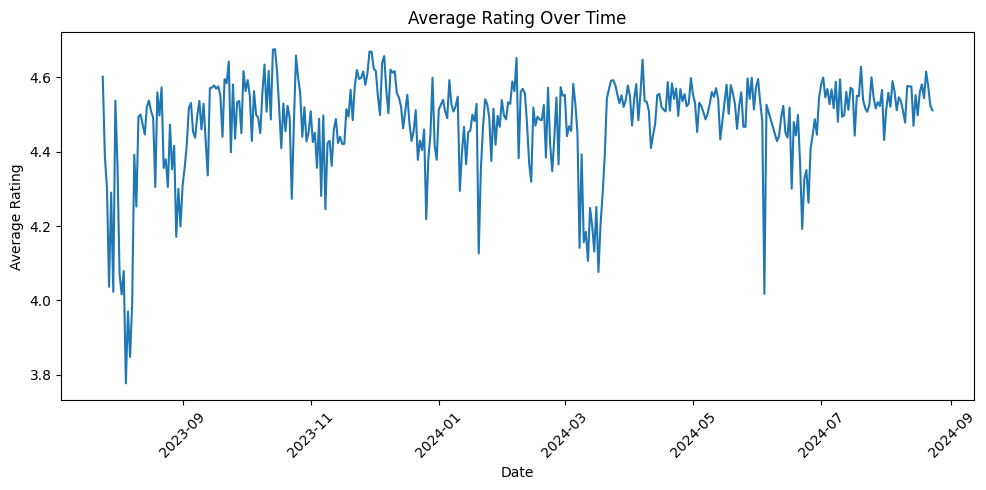

In [17]:
plt.figure(figsize=(10,5))
plt.plot(daily_avg.index, daily_avg.values)
plt.title("Average Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
sentiment_trend = df.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)
sentiment_trend

Sentiment,Negative,Neutral,Positive
Date,,,
2023-07-25,189,102,2841
2023-07-26,215,91,1687
2023-07-27,153,57,939
2023-07-28,112,33,429
2023-07-29,39,15,225
...,...,...,...
2024-08-19,70,31,882
2024-08-20,62,40,1004
2024-08-21,79,39,1026


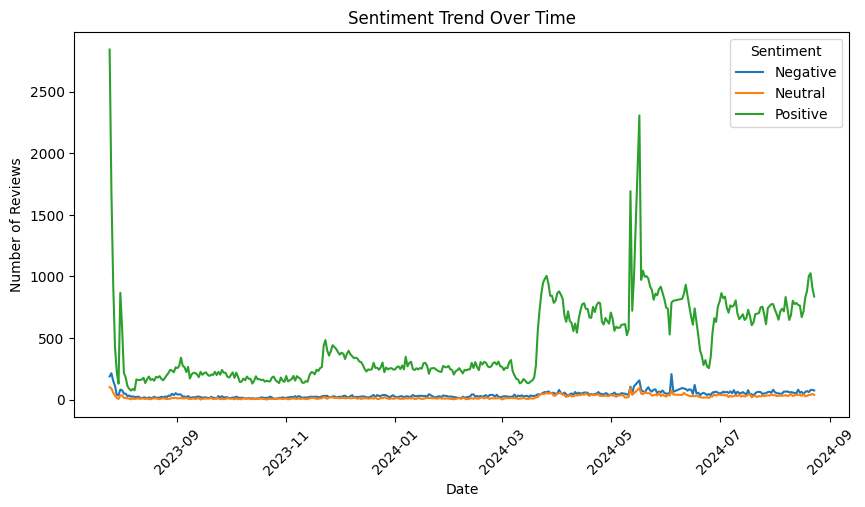

In [19]:
sentiment_trend.plot(figsize=(10,5))
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()


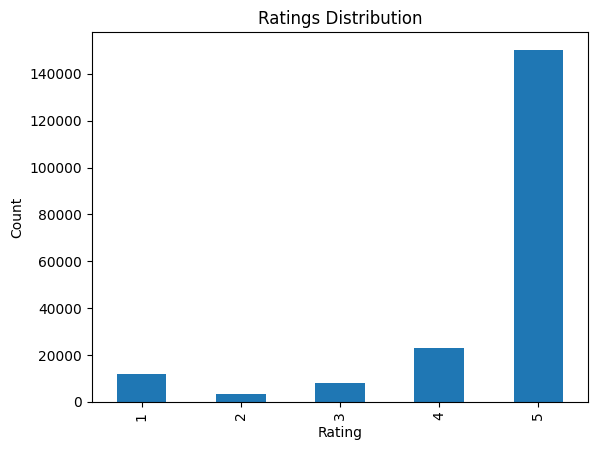

In [20]:
df['Ratings'].value_counts().sort_index().plot(kind='bar')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [3]:
!pip install wordcloud

# import pandas as pd
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [24]:
text = " ".join(df["Review"])
# Create WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(text)


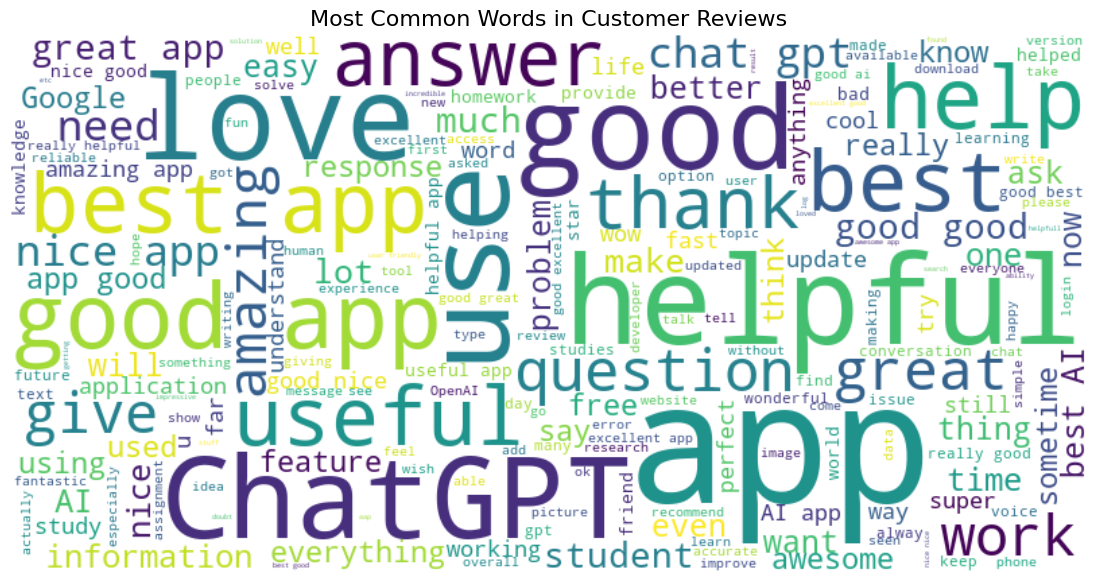

In [25]:
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Customer Reviews", fontsize=16)
plt.show()


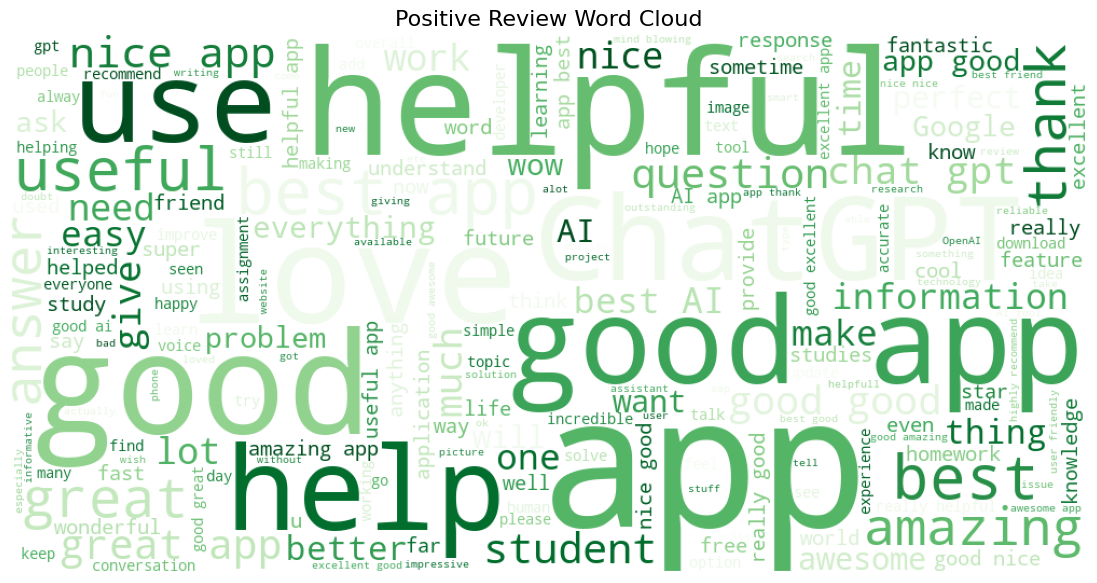

In [26]:
positive_text = " ".join(
    df[df["Ratings"] >= 4]["Review"]
)

positive_wc = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    colormap="Greens"
).generate(positive_text)

plt.figure(figsize=(14,7))
plt.imshow(positive_wc)
plt.axis("off")
plt.title("Positive Review Word Cloud", fontsize=16)
plt.show()


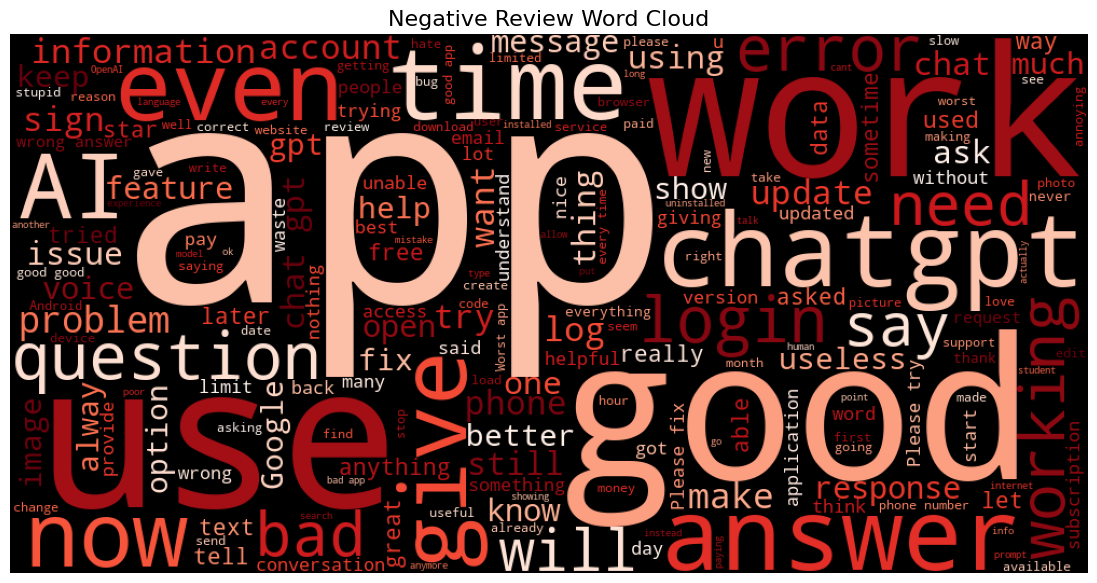

In [27]:
negative_text = " ".join(
    df[df["Ratings"] <= 2]["Review"]
)

negative_wc = WordCloud(
    width=1000,
    height=500,
    background_color="black",
    colormap="Reds"
).generate(negative_text)

plt.figure(figsize=(14,7))
plt.imshow(negative_wc)
plt.axis("off")
plt.title("Negative Review Word Cloud", fontsize=16)
plt.show()


In [28]:
from wordcloud import WordCloud, STOPWORDS
negative_reviews = df[df["Sentiment"] == "Negative"]["Review"]

import re
from collections import Counter

text = " ".join(negative_reviews).lower()
text = re.sub(r"[^a-z\s]", "", text)

words = text.split()
word_freq = Counter(words)

stopwords = set(STOPWORDS)
filtered_words = {word: count for word, count in word_freq.items() if word not in stopwords}

top_complaints = Counter(filtered_words).most_common(15)
top_complaints


[('app', 4376),
 ('good', 1710),
 ('cant', 1637),
 ('use', 1102),
 ('even', 1049),
 ('doesnt', 1026),
 ('chatgpt', 978),
 ('time', 909),
 ('dont', 899),
 ('ai', 889),
 ('error', 857),
 ('working', 856),
 ('please', 849),
 ('work', 837),
 ('login', 774)]